# Домашнее задание

Работаем с датасетом про дорожные знаки.

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data

В первых двух задачах берем только файл train.pickle и можно подгрузить labels_names.csv

Данные можно прочитать через `pd.read_pickle`

## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [3]:
data = pd.read_pickle('../data/train.pickle')
data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

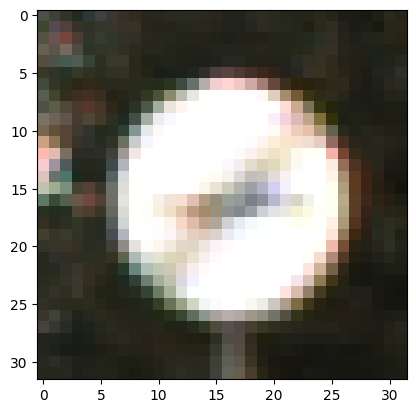

In [4]:
tmp = data['features'][150]
plt.imshow(tmp)

In [5]:
x = data['features']
y = data['labels']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, y_train.shape

((27839, 32, 32, 3), (27839,))

In [6]:
# по y все заходит, сделаем так, чтобы могли загнать x_train в 1-мерный массив
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_pred = model.predict(x_test)

df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

array([[ 32,   2,   0, ...,   0,   0,   0],
       [  4, 362,  11, ...,   0,   0,   0],
       [  2,  11, 337, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  65,   0,   0],
       [  0,   0,   0, ...,   0,  36,   0],
       [  0,   0,   0, ...,   0,   1,  32]], dtype=int64)

Видно, что модель чаще всего ошибается в первой 9x9 табличке, посмотрим, какие там знаки.
Посмотрим в файлик label_names.csv, и поймем, что там знаки ограничения скорости, которые +- похожие друг на друга, так что тут ничего аномального нет

In [8]:
ac_score = accuracy_score(y_test, y_pred)
ac_score

0.9492816091954023

In [9]:
rec_score = recall_score(y_test, y_pred, average='weighted')
rec_score

0.9492816091954023

Почему выбрал именно такие метрики? Confusion_matrix хорошо показывает, в каких знаках чаще всего путается модель. Accuracy score показывает общую картину, как часто, в целом, дает правильные ответы. Ну а recall_score, чтобы посчитать как часто модель правильно попадает в positive выборку.


## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

In [10]:
model_nbk = MultinomialNB()
model_knn = KNeighborsClassifier(n_neighbors=5)

model_svm_l = SVC(kernel='linear')  
model_svm_p = SVC(kernel='poly', max_iter=350)
model_svm_r = SVC(kernel='rbf', max_iter=350)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model_nbk.fit(x_train, y_train)

MultinomialNB()

In [12]:
y_pred = model_nbk.predict(x_test)

df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

array([[ 17,   3,   2, ...,   0,   0,   0],
       [ 59,  42,  73, ...,   0,  13,   0],
       [ 14,  19, 102, ...,   0,  31,   0],
       ...,
       [  0,   1,   2, ...,  25,   8,   2],
       [  0,   0,   1, ...,   0,  24,   5],
       [  0,   0,   0, ...,   0,  28,   8]], dtype=int64)

In [13]:
rec_score = recall_score(y_test, y_pred, average='weighted')
rec_score

0.3271551724137931

In [14]:
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)

df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

array([[ 29,   1,   1, ...,   0,   0,   0],
       [  2, 358,   3, ...,   0,   0,   0],
       [  2,   8, 334, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  58,   0,   0],
       [  0,   1,   2, ...,   0,  32,   0],
       [  0,   1,   0, ...,   0,   0,  49]], dtype=int64)

In [15]:
rec_score = recall_score(y_test, y_pred, average='weighted')
rec_score

0.8737068965517242

In [16]:
model_svm_l.fit(x_train,y_train)
y_pred = model_svm_l.predict(x_test)

df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

array([[ 32,   0,   1, ...,   0,   0,   0],
       [  4, 359,   7, ...,   0,   0,   0],
       [  0,   6, 369, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ...,  66,   0,   0],
       [  0,   0,   0, ...,   0,  41,   0],
       [  0,   0,   0, ...,   0,   0,  48]], dtype=int64)

In [20]:
rec_score = recall_score(y_test, y_pred, average='weighted')
rec_score

0.9594827586206897

In [21]:
model_svm_r.fit(x_train,y_train)
y_pred = model_svm_r.predict(x_test)

df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

D:\jupyter\venv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[ 28,   5,   0, ...,   0,   0,   0],
       [  0, 341,  18, ...,   0,   0,   0],
       [  0,  13, 304, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  60,   0,   0],
       [  0,   0,   2, ...,   0,  34,   1],
       [  0,   0,   0, ...,   0,   1,  44]], dtype=int64)

In [22]:
rec_score = recall_score(y_test, y_pred, average='weighted')
rec_score

0.7992816091954023

In [23]:
model_svm_p.fit(x_train,y_train)
y_pred = model_svm_p.predict(x_test)

df_confusion = confusion_matrix(y_test, y_pred)
df_confusion  

D:\jupyter\venv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[ 31,   0,   1, ...,   0,   0,   0],
       [ 22, 251,   8, ...,   0,   0,   0],
       [  3,  43, 129, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  50,   0,   0],
       [  0,   0,   0, ...,   0,  26,   1],
       [  1,   0,   0, ...,   0,   0,  15]], dtype=int64)

In [24]:
rec_score = recall_score(y_test, y_pred, average='weighted')
rec_score

0.5551724137931034

Хуже всего отработал наивный баесовский классификатор, потому что нет независимости, что вышло очень критичным тут\
Лучше всего же отработали: Логистическая регрессия и SVM(linear)


## Hard

Вы - ML-инженер в команде беспилотных автомобилей! Ваша следующая цель - сделать алгоритм, который будет распознавать дорожные знаки. Другая команда уже позаботилась о подготовке данных - вам приходят обрезанные картинки 32х32. Но есть проблема - разметка стоит денег, у проекта есть бюджетные ограничения, но вам готовы выделить тот бюджет, который вы сможете обосновать.

Определите сколько и каких семплов данных необходимо для того, чтобы обучить достаточно хороший алгоритм.

**Подсказка:** При анализе изображений обычно делают специальную предобработку - картинки крутят-вертят, по-разному меняют цвета. Рядом с данными лежит питоновский скрипт, может быть он поможет уменьшить необходимое количество семплов?